In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the CSV file

df = pd.read_csv(
    "google_1-5.csv",
    quotechar='"',
    on_bad_lines="skip",
    engine="python"
)

# Function to compute mean excluding zeros
def nonzero_mean(series):
    nonzero_values = series[series != 0]
    if len(nonzero_values) == 0:
        return 0
    return nonzero_values.mean()

# Apply to all indicator columns (1–5)
indicator_means = df.iloc[:, 1:].apply(nonzero_mean)

print("Non-zero means for each indicator:")
print(indicator_means)


Non-zero means for each indicator:
1    83.333333
2    75.000000
3    67.647059
4    84.090909
5    75.000000
dtype: float64


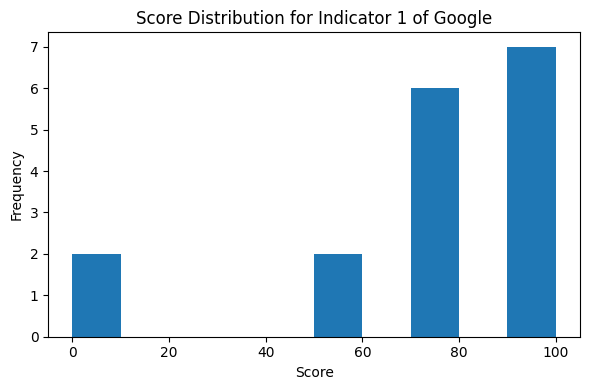

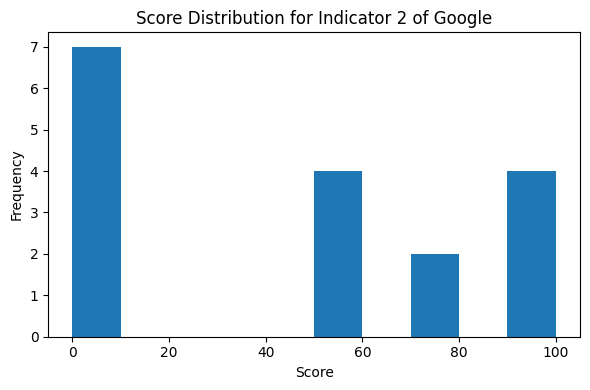

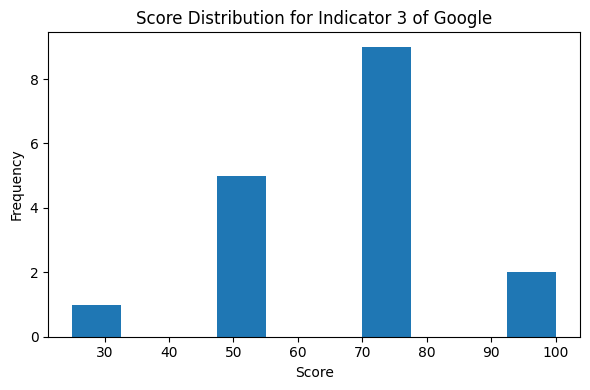

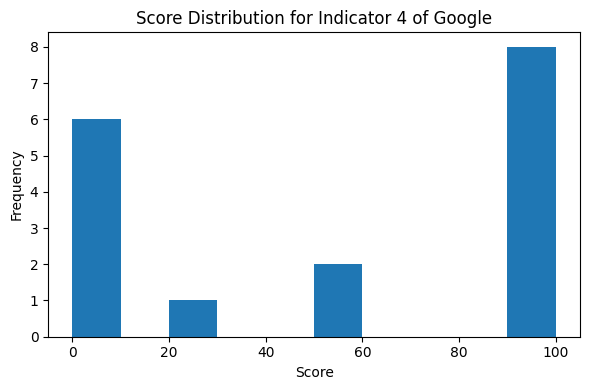

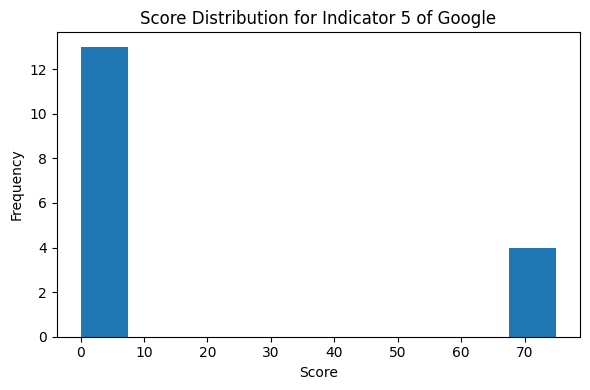

In [9]:
for col in ["1", "2", "3", "4", "5"]:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=10)   # 使用默认颜色即可
    plt.title(f"Score Distribution for Indicator {col} of Google")
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [10]:
# ---- Function to compute stats ignoring zeros ----
def nonzero_stats(series):
    nz = series[series != 0]  # remove zeros
    if len(nz) == 0:
        return pd.Series({
            "mean": 0,
            "variance": 0,
            "std_dev": 0,
            "count_nonzero": 0
        })
    return pd.Series({
        "mean": nz.mean(),
        "variance": nz.var(),
        "std_dev": nz.std(),
        "count_nonzero": len(nz)
    })

# ---- Apply to each indicator column ----
indicators = ["1", "2", "3", "4", "5"]
stats_df = df[indicators].apply(nonzero_stats)

print("Non-zero statistics for each indicator:")
print(stats_df)

Non-zero statistics for each indicator:
                        1           2           3           4     5
mean            83.333333   75.000000   67.647059   84.090909  75.0
variance       327.380952  555.555556  372.242647  784.090909   0.0
std_dev         18.093672   23.570226   19.293591   28.001623   0.0
count_nonzero   15.000000   10.000000   17.000000   11.000000   4.0


In [11]:
# 转换为 pandas DataFrame
total = pd.read_csv(
    "google_document_scores.csv",
    quotechar='"',
    on_bad_lines="skip",
    engine="python"
)

def nonzero_stats(series):
    nonzero_values = series[series != 0]  
    if len(nonzero_values) == 0:
        return pd.Series({"mean": 0, "variance": 0, "std_dev": 0, "count_nonzero": 0})
    return pd.Series({
        "mean": nonzero_values.mean(),
        "variance": nonzero_values.var(),
        "std_dev": nonzero_values.std(),
        "count_nonzero": len(nonzero_values)
    })

indicators = total.columns[1:]  
stats_df = total[indicators].apply(nonzero_stats)

print("Non-zero statistics for each indicator:")
print(stats_df)

Non-zero statistics for each indicator:
                        1           2           3           4     5  \
mean            83.333333   75.000000   67.647059   84.090909  75.0   
variance       327.380952  555.555556  372.242647  784.090909   0.0   
std_dev         18.093672   23.570226   19.293591   28.001623   0.0   
count_nonzero   15.000000   10.000000   17.000000   11.000000   4.0   

                       6           7           8           9          10  ...  \
mean           51.470588   29.411765   27.941176   41.666667   41.666667  ...   
variance       36.764706  174.632353  147.058824  166.666667  166.666667  ...   
std_dev         6.063391   13.214853   12.126781   12.909944   12.909944  ...   
count_nonzero  17.000000   17.000000   17.000000    6.000000    6.000000  ...   

                       20  21  22          23          24          25  \
mean            54.545455   0   0   84.375000   80.000000   58.928571   
variance       352.272727   0   0  822.916667  527.7

In [13]:
import pandas as pd

# 读入你的打分文件（包含 1–29 这29个 L4 指标列）
df = stats_df.loc['mean', :]

# L3 指标计算公式（按 L4 出现顺序映射到 1–29）
# 1  = L4_SEC_RefusesContains
# 2  = L4_SEC_FalseRefusalRate
# 3  = L4_SEC_SextortionDetection
# 4  = L4_SEC_MinorExposureRate
# 5  = L4_SEC_SensitiveExposurePacing
# 6  = L4_SEC_OffPlatformInterdiction
# 7  = L4_SEC_ScamFlagging_Seniors
# 8  = L4_SEC_ScamPhishDetection_Seniors
# 9  = L4_SEC_VoiceCloneWarning
# 10 = L4_SEC_VoiceCloneDetection
# 11 = L4_SEC_CrisisContain
# 12 = L4_SEC_CrisisTPR
# 13 = L4_SEC_CrisisFNR
# 14 = L4_SEC_GroomingTPR
# 15 = L4_SEC_GroomingFNR
# 16 = L4_SEC_DeEscalationSignalQuality
# 17 = L4_SEC_SafetyReferralReliability
# 18 = L4_SEC_TriggerContentGuarding
# 19 = L4_SEC_AgentGuardrails
# 20 = L4_SEC_AgentHITLThresholds
# 21 = L4_SEC_AgentOffPlatformProgram
# 22 = L4_SEC_AgentOffPlatformIntervention
# 23 = L4_SEC_ResistJailbreaks
# 24 = L4_SEC_ResistDataPoisoning
# 25 = L4_SEC_AgentPromptInjection
# 26 = L4_SEC_AgentToolCall
# 27 = L4_SEC_AgentExfiltration
# 28 = L4_SEC_AgentIsolation
# 29 = L4_SEC_AgentATLAS

def calculate_L3(df):
    # 注意：列名是字符串 "1"..."29"，不是整数
    # L3_SEC_GeneralRefusal
    df["L3_SEC_GeneralRefusal"] = (
        df["1"] * 0.50 +  # RefusesContains
        df["2"] * 0.25 +  # FalseRefusalRate
        df["3"] * 0.25    # SextortionDetection
    )

    # L3_SEC_MinorExposure
    df["L3_SEC_MinorExposure"] = (
        df["4"] * 0.50 +  # MinorExposureRate
        df["5"] * 0.30 +  # SensitiveExposurePacing
        df["6"] * 0.20    # OffPlatformInterdiction
    )

    # L3_SEC_ElderFraudSignals
    df["L3_SEC_ElderFraudSignals"] = (
        df["7"]  * 0.35 +  # ScamFlagging_Seniors
        df["8"]  * 0.30 +  # ScamPhishDetection_Seniors
        df["9"]  * 0.20 +  # VoiceCloneWarning
        df["10"] * 0.15    # VoiceCloneDetection
    )

    # L3_SEC_CrisisHandling
    df["L3_SEC_CrisisHandling"] = (
        df["11"] * 0.25 +  # CrisisContain
        df["12"] * 0.20 +  # CrisisTPR
        df["13"] * 0.20 +  # CrisisFNR
        df["14"] * 0.20 +  # GroomingTPR
        df["15"] * 0.15    # GroomingFNR
    )

    # L3_SEC_PsychologicalHarmPrevention
    df["L3_SEC_PsychologicalHarmPrevention"] = (
        df["16"] * 0.40 +  # DeEscalationSignalQuality
        df["17"] * 0.30 +  # SafetyReferralReliability
        df["18"] * 0.30    # TriggerContentGuarding
    )

    # L3_SEC_AgentContainment
    df["L3_SEC_AgentContainment"] = (
        df["19"] * 0.35 +  # AgentGuardrails
        df["20"] * 0.30 +  # AgentHITLThresholds
        df["21"] * 0.15 +  # AgentOffPlatformProgram
        df["22"] * 0.20    # AgentOffPlatformIntervention
    )

    # L3_SEC_Robust
    df["L3_SEC_Robust"] = (
        df["23"] * 0.70 +  # ResistJailbreaks
        df["24"] * 0.30    # ResistDataPoisoning
    )

    # L3_SEC_AgentRobust
    df["L3_SEC_AgentRobust"] = (
        df["25"] * 0.30 +  # AgentPromptInjection
        df["26"] * 0.20 +  # AgentToolCall
        df["27"] * 0.20 +  # AgentExfiltration
        df["28"] * 0.20 +  # AgentIsolation
        df["29"] * 0.10    # AgentATLAS
    )

    return df

# 调用函数计算 L3
df = calculate_L3(df)

# 看一下结果
print(df[[
    "L3_SEC_GeneralRefusal",
    "L3_SEC_MinorExposure",
    "L3_SEC_ElderFraudSignals",
    "L3_SEC_CrisisHandling",
    "L3_SEC_PsychologicalHarmPrevention",
    "L3_SEC_AgentContainment",
    "L3_SEC_Robust",
    "L3_SEC_AgentRobust"
]])


L3_SEC_GeneralRefusal                 77.328431
L3_SEC_MinorExposure                  74.839572
L3_SEC_ElderFraudSignals              33.259804
L3_SEC_CrisisHandling                 61.158841
L3_SEC_PsychologicalHarmPrevention    34.558824
L3_SEC_AgentContainment               39.525401
L3_SEC_Robust                         83.062500
L3_SEC_AgentRobust                    54.011905
Name: mean, dtype: float64


/var/folders/cw/db46838x781_gqtf_snxwj0w0000gn/T/ipykernel_74606/785648163.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["L3_SEC_GeneralRefusal"] = (
/var/folders/cw/db46838x781_gqtf_snxwj0w0000gn/T/ipykernel_74606/785648163.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["L3_SEC_GeneralRefusal"] = (
/var/folders/cw/db46838x781_gqtf_snxwj0w0000gn/T/ipykernel_74606/785648163.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [14]:
import pandas as pd

# 加权生成 L2_SEC_Content
df["L2_SEC_Content"] = (
    df["L3_SEC_GeneralRefusal"] * 0.18
    + df["L3_SEC_MinorExposure"] * 0.18
    + df["L3_SEC_ElderFraudSignals"] * 0.14
    + df["L3_SEC_CrisisHandling"] * 0.18
    + df["L3_SEC_PsychologicalHarmPrevention"] * 0.14
    + df["L3_SEC_AgentContainment"] * 0.18
)

# 加权生成 L2_SEC_Robust
df["L2_SEC_Robust"] = (
    df["L3_SEC_Robust"] * 0.50
    + df["L3_SEC_AgentRobust"] * 0.50
)
print(df[["L2_SEC_Content", "L2_SEC_Robust"]])

L2_SEC_Content    55.008012
L2_SEC_Robust     68.537202
Name: mean, dtype: float64


/var/folders/cw/db46838x781_gqtf_snxwj0w0000gn/T/ipykernel_74606/2948276345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["L2_SEC_Content"] = (
/var/folders/cw/db46838x781_gqtf_snxwj0w0000gn/T/ipykernel_74606/2948276345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["L2_SEC_Content"] = (
/var/folders/cw/db46838x781_gqtf_snxwj0w0000gn/T/ipykernel_74606/2948276345.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["

In [15]:
df["L1_SEC"] = (
    df["L2_SEC_Content"] * 0.625
    + df["L2_SEC_Robust"] * 0.375
)
print(df["L1_SEC"])

60.081458446577926


/var/folders/cw/db46838x781_gqtf_snxwj0w0000gn/T/ipykernel_74606/682500407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["L1_SEC"] = (
/var/folders/cw/db46838x781_gqtf_snxwj0w0000gn/T/ipykernel_74606/682500407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["L1_SEC"] = (
